## 🧠 Project Objective

# We will try to predict whether a tip is 'high' or 'low' based on other features in the dataset like total bill, day, smoker, etc.

# We defined a binary label: 

> 1: High Tip
> 0: Low Tip

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
df.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


🎯 Step 2 — Define the ML Task

We’ll create a binary classification task to predict whether a tip is “high” or “low”.

Let’s define high tips as those greater than the median tip.
📌 Why use the median?

    Because it naturally splits the dataset in half

    It’s more robust than the mean, especially in skewed distributions

In [22]:
median_tip = df['tip'].median()
df['high_tip'] = (df['tip'] > median_tip).astype(int)
df.head()

,total_bill,tip,sex,smoker,day,time,size,high_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


🧮 Step 3 — Select Features & Prepare Data

Since we're doing a classification task, we need to:
✅ 1. Choose Input Features

We’ll use these columns as predictors:

    total_bill (numeric)

    size (numeric)

    sex (categorical)

    smoker (categorical)

    day (categorical)

    time (categorical)

    ✅ Avoid using tip because it directly determines high_tip, our target.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
x = df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = df['high_tip']

# Define categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Column transformer to one-hot encode categorical features\
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough' # keeps numerical features
    )

# Apply transformation 

x_processed = preprocessor.fit_transform(x)
x_processed

array([[ 0.  ,  0.  ,  0.  , ...,  0.  , 16.99,  2.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  , 10.34,  3.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  , 21.01,  3.  ],
       ...,
       [ 1.  ,  1.  ,  1.  , ...,  0.  , 22.67,  2.  ],
       [ 1.  ,  0.  ,  1.  , ...,  0.  , 17.82,  2.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 18.78,  2.  ]])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Accuracy measures the percentage of correct predictions


Accuracy: 73.47%


In [36]:
model.coef_

array([[-0.09589204,  0.10604641, -0.63939768, -0.08590211, -0.14256006,
        -0.50854713,  0.16490931,  0.34246408]])

In [38]:
# Get one-hot encoded feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine with numeric column names
all_feature_names = list(cat_features) + ['total_bill', 'size']  # or whatever numerical columns you used


In [40]:
import pandas as pd

coefs = model.coef_[0]
feature_importance = pd.Series(coefs, index=all_feature_names).sort_values(key=abs, ascending=False)

feature_importance


day_Sat      -0.639398
time_Lunch   -0.508547
size          0.342464
total_bill    0.164909
day_Thur     -0.142560
smoker_Yes    0.106046
sex_Male     -0.095892
day_Sun      -0.085902
dtype: float64

In [42]:
# A positive coefficient → increases the likelihood of a high tip.

# A negative coefficient → decreases the likelihood of a high tip.

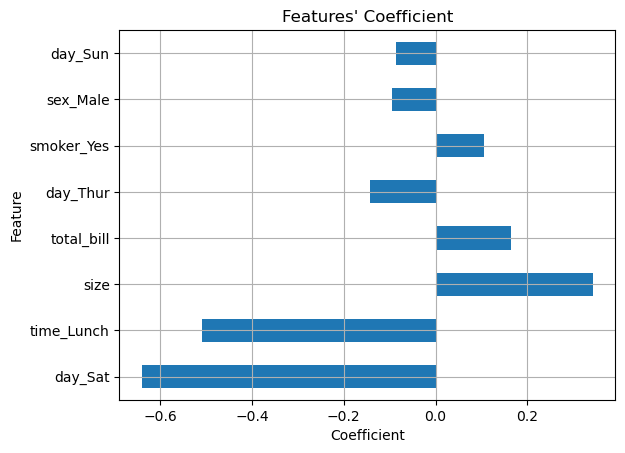

In [68]:
import matplotlib.pyplot as plt

# Sample data for stacked bar plot
data = feature_importance

# Stacked bar plot
data.plot(kind='barh', stacked=True, title="Features' Coefficient")
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.savefig('Features_Coefficient.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
# day_sat and time_lunch have the strongest negative impact on predicting a high tip.

# size has the strongest positive impact. Bigger groups are more likely to leave high tips.

🔍 Step 6 – Model Evaluation (in more detail)

We'll expand on your accuracy metric with:

    Confusion Matrix (📊 shows true positives, false positives, etc.)

    Classification Report (📄 precision, recall, f1-score)

    Optional: ROC Curve & AUC score (📈 if you want visual evaluation)

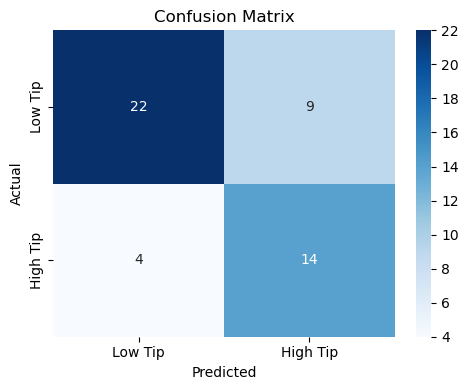


Classification Report:
              precision    recall  f1-score   support

     Low Tip       0.85      0.71      0.77        31
    High Tip       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49



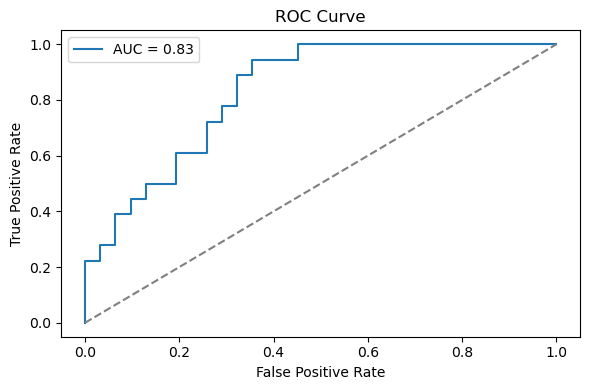

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Confusion Matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Tip', 'High Tip'], yticklabels=['Low Tip', 'High Tip'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Tip', 'High Tip']))

# 3. ROC Curve + AUC
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# The model can distinguish between high and low tips about 83% of the time.